In [35]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Сопряженное к экспоненциальному является гамма-распределение. Подберем значения параметров $\alpha$ и $\beta$ данного распределения. Наши априорные знания будут базироваться на том, что мы примерно знаем, что сервер выходит из строя приблизительно каждую минуту, то есть каждые 60 секунд. Так как мы знаем, что времена между выходами из строя серверов распределены экспоненциально с параметром $\lambda$, то их матожидание равно $\frac{1}{\lambda}$, что в нашем предположении должно равняться приблизительно 60. То есть параметр $\lambda$ приблизительно равняется $\frac{1}{60}$, то есть плотность распределения значения параметра $\lambda$ должна быть наибольшей около 0. Перербрав несколько значений параметров $\alpha$ и $\beta$, наиболее подходящими показались значения $\alpha = 0.5, \beta = 30$. Посмотрим на график плотности распределения при данных значениях.

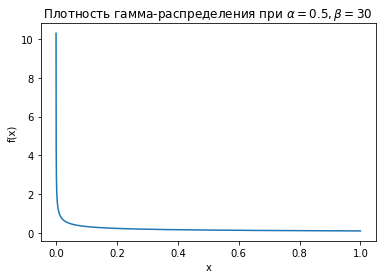

In [36]:
x = np.linspace(0, 1, 10000)
alpha, beta = 0.5, 30
plt.plot(x, sts.gamma.pdf(x, a=alpha, scale=beta))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title(r"""Плотность гамма-распределения при $\alpha=0.5, \beta=30$""");

Как видно из графика, наибольшая вероятность достигается вблизи нуля, что и соответсвует нашему априорному знанию о том, что $\lambda$ должна быть не очень большой.

Байесовская оценка параметра $\lambda$ равна $\frac{n + \alpha}{\sum_{i=1}^n X_i + \beta}$. Поэтому даже при отсутствии данных наша байесовская оценка будет равна $\frac{1}{60}$.

Далее проделаем те же действие, что и в задаче 5.1.

In [37]:
data = pd.read_csv("6.csv.xls", header=None, names=["time"])

In [38]:
data.head()

,time
0,lambda = 88
1,t_0 = 300
2,t = 90000
3,58.3458
4,117.1273


In [39]:
t_0 = 300 // 100
t = 90000
data = data[3:]

In [40]:
data.head()

,time
3,58.3458
4,117.1273
5,303.7976
6,481.9694
7,496.6469


In [41]:
values = np.array(data.values, dtype=float)

В данном случае, функция также будет принимать на вход данные, которые уже стали известны (параметр sample), а также чисто технический параметр sleep, обозначающий будет ли каждые 3 секунды программа выводить поочередно обновленные значения или сразу выведет все. Также данная функция будет вычислять на каждом шаге байесовскую оценку параметра $\lambda$, приведенную выше.

In [71]:
def count(stop=None, sleep=True):
    current_not_working = 0
    k = 0
    sample = []
    while (stop is None or k * t_0 <= stop) and current_not_working < len(values):
        while current_not_working < len(values) and k * t_0 >= values[current_not_working][0]:
            current_not_working += 1
            if current_not_working > 0:
                sample.append(values[current_not_working][0] 
                              - values[current_not_working - 1][0])
        lambd = (len(sample) + alpha) / (sum(sample) + beta)
        if sleep:
            print("E(N_t|N_{}) = ".format(k * t_0), lambd * (t - k * t_0) 
                  + current_not_working, 'lambda = ', lambd)
            time.sleep(t_0)
        else:
            if (k * t_0) % 3000 == 0 and k * t_0 < 80000:
                print("E(N_t|N_{}) = ".format(k * t_0), lambd * (t - k * t_0) 
                  + current_not_working, 'lambda = ', lambd)
            elif k * t_0 > 80000:
                break
        k += 1

Запустим нашу программу, которая каждые 3 секунды выводит обновленное значение условного матожидания и оценку параметра $\lambda$. Как и в задаче 5.1 наша программа будет работать 70 секунд.

In [69]:
count(stop=70)

E(N_t|N_0) =  1500.0 lambda =  0.016666666666666666
E(N_t|N_3) =  1499.95 lambda =  0.016666666666666666
E(N_t|N_6) =  1499.9 lambda =  0.016666666666666666
E(N_t|N_9) =  1499.85 lambda =  0.016666666666666666
E(N_t|N_12) =  1499.8 lambda =  0.016666666666666666
E(N_t|N_15) =  1499.75 lambda =  0.016666666666666666
E(N_t|N_18) =  1499.7 lambda =  0.016666666666666666
E(N_t|N_21) =  1499.65 lambda =  0.016666666666666666
E(N_t|N_24) =  1499.6 lambda =  0.016666666666666666
E(N_t|N_27) =  1499.55 lambda =  0.016666666666666666
E(N_t|N_30) =  1499.5 lambda =  0.016666666666666666
E(N_t|N_33) =  1499.45 lambda =  0.016666666666666666
E(N_t|N_36) =  1499.4 lambda =  0.016666666666666666
E(N_t|N_39) =  1499.35 lambda =  0.016666666666666666
E(N_t|N_42) =  1499.3 lambda =  0.016666666666666666
E(N_t|N_45) =  1499.25 lambda =  0.016666666666666666
E(N_t|N_48) =  1499.2 lambda =  0.016666666666666666
E(N_t|N_51) =  1499.15 lambda =  0.016666666666666666
E(N_t|N_54) =  1499.1 lambda =  0.0166666

Также для наглядности посмотрим, что выведет наша программа в какие-то поздние моменты времени (через каждые 3000 секунд до 80000 секунд).

In [72]:
count(sleep=False)

E(N_t|N_0) =  1500.0 lambda =  0.016666666666666666
E(N_t|N_3000) =  977.378456812688 lambda =  0.010866419043824
E(N_t|N_6000) =  968.1190884704057 lambda =  0.010763322481790544
E(N_t|N_9000) =  952.6470725585611 lambda =  0.01058823546368594
E(N_t|N_12000) =  992.5533103824696 lambda =  0.0110327347484932
E(N_t|N_15000) =  959.4324019984037 lambda =  0.01065909869331205
E(N_t|N_18000) =  989.4691279636121 lambda =  0.01099262677727239
E(N_t|N_21000) =  992.5777798130913 lambda =  0.010993880866856395
E(N_t|N_24000) =  1037.1825576049268 lambda =  0.011533069054620105
E(N_t|N_27000) =  1039.3005857607805 lambda =  0.011544453742234609
E(N_t|N_30000) =  1038.9181917685526 lambda =  0.011548636529475876
E(N_t|N_33000) =  1074.3450992084386 lambda =  0.011935878933481381
E(N_t|N_36000) =  1056.658224138538 lambda =  0.011734411558121072
E(N_t|N_39000) =  1054.8882410515648 lambda =  0.011723298844148331
E(N_t|N_42000) =  1049.3255402526083 lambda =  0.011652615421929337
E(N_t|N_45000) =

Вывод: видно, что при начальных моментах времени, при отсутствии данных, наша оценка немного завышена, а при больших значениях времени очень похожа на истинную. Таким образом, не зная точного значения параметра $\lambda$ мы получили значения условного матожидания, которые больше отличаются от истинного значения (в работе 5.1 было показано, что оно должно быть чуть больше 1000, так как на момент времени 86624 вышло из строя 1000 серверов). Тем не менее, не зная истинного значения параметра $\lambda$ мы все равно с довольно неплохой точностью смогли приблизительно спрогнозировать количество серверов вышедших из строя в момент времени 90000.